In [170]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [171]:
def load_data():
    data = np.genfromtxt('salary.csv', delimiter=',', skip_header=1)
    return data[:,0] , data[:,1]


In [172]:
def z_score_normalized_features(x):
    mu = np.mean(x)
    sigma = np.std(x)
    return (x - mu) / sigma

def predict(x,w,b):
    return w * x + b

def calculate_cost(x,y,w,b):
    m = x.shape[0]
    total_cost = 0

    for i in range(m):
        predicted_y = predict(x[i],w,b)
        total_cost += (predicted_y - y[i]) ** 2

    return (1 / (2*m))* total_cost

def find_gradient_derivatives(x,y,w,b):
    m = x.shape[0]
    dj_dw = 0.
    dj_db = 0.
    for i in range(m):
        predicted_y = predict(x[i],w,b)
        temp_dj_dw = (predicted_y - y[i])*x[i]
        temp_dj_db = (predicted_y - y[i])

        dj_dw += temp_dj_dw
        dj_db += temp_dj_db

    dj_dw = (1/m)*dj_dw
    dj_db = (1/m)*dj_db

    return dj_dw,dj_db

def calculate_gradient_descent(x_in,y_in,w,b,alpha=0.001,iterations=1000):
    w_histort = []
    w_history = []
    cost_history = []

    for i in range(iterations):
        dj_dw ,dj_db = find_gradient_derivatives(x_in,y_in,w,b)
        #print(f"dj_dw : {dj_dw} , dj_db : {dj_db}")
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
    
        if i <100000:
            cost_history.append(calculate_cost(x_in,y_in,w,b))
            w_history.append(w)
        
        if i% math.ceil(iterations/10)==0:
            w_histort.append(w)
            print(f"Iterations : {i} Cost : {cost_history[-1]:0.2e}")

        if i==iterations-1:
            w_histort.append(w)
            print(f"Iterations : {i+1} Cost : {cost_history[-1]:0.2e}")

    return w,b,w_history,cost_history

def compute_model_output(x,w,b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = (x[i] * w) + b

    return f_wb


Iterations : 0 Cost : 3.19e+09
Iterations : 100 Cost : 4.41e+08
Iterations : 200 Cost : 7.26e+07
Iterations : 300 Cost : 2.33e+07
Iterations : 400 Cost : 1.67e+07
Iterations : 500 Cost : 1.58e+07
Iterations : 600 Cost : 1.57e+07
Iterations : 700 Cost : 1.56e+07
Iterations : 800 Cost : 1.56e+07
Iterations : 900 Cost : 1.56e+07
Iterations : 1000 Cost : 1.56e+07
Calculated w : 26366.04413938564 , b : 75999.7188556831
predict 8 : 101387.5215555621


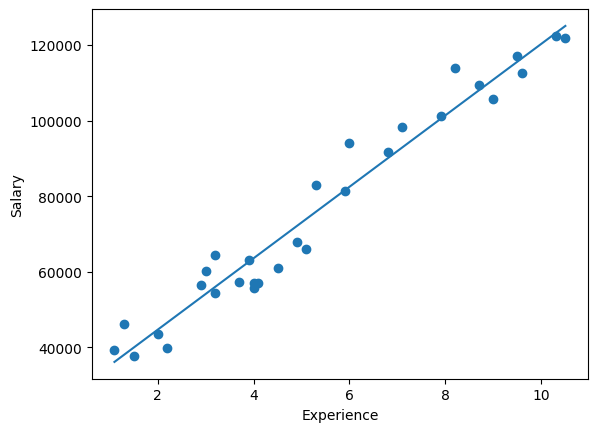

In [176]:
x,y = load_data()
x_norm = z_score_normalized_features(x)

initial_w = 0.
initial_b = 0.

w,b,w_history,cost_history = calculate_gradient_descent(x_norm,y,initial_w,initial_b,alpha=0.01,iterations=1000)
print(f"Calculated w : {w} , b : {b}")


x_mean, x_std = np.mean(x), np.std(x)
age = 8
scaled_input = (age - x_mean) / x_std

# predict_price = predict(age,w,b)
# print(f"Experience : {age}, Predicted price {predict_price}")

predicted_y = compute_model_output(x_norm,w,b)

print(f"predict 8 : {(w*scaled_input)+b}")
plt.scatter(x,y)
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.plot(x,predicted_y)

[np.float64(263.6718244354243), np.float64(524.7069306264943), np.float64(783.1316857556537), np.float64(1038.9721933335215), np.float64(1292.2542958356105), np.float64(1543.0035773126785), np.float64(1791.245365974976), np.float64(2037.0047367506506), np.float64(2280.3065138185684), np.float64(2521.175273115807), np.float64(2759.6353448200734), np.float64(2995.710815807297), np.float64(3229.4255320846482), np.float64(3460.803101199226), np.float64(3689.866894622658), np.float64(3916.640050111856), np.float64(4141.145474046161), np.float64(4363.405843741124), np.float64(4583.443609739137), np.float64(4801.28099807717), np.float64(5016.9400125318225), np.float64(5230.442436841929), np.float64(5441.809836908934), np.float64(5651.063562975269), np.float64(5858.22475178094), np.float64(6063.314328698555), np.float64(6266.353009846994), np.float64(6467.361304183948), np.float64(6666.359515577533), np.float64(6863.367744857182), np.float64(7058.405891844034), np.float64(7251.493657361018), n

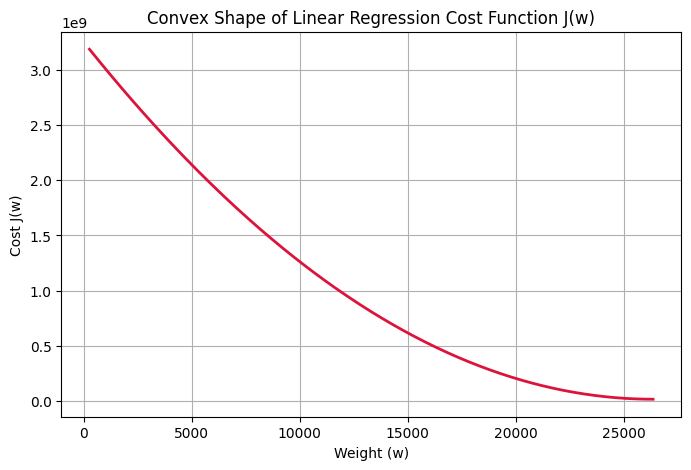

In [174]:
print(w_history)
plt.figure(figsize=(8,5))
plt.plot(w_history, cost_history, color='crimson', linewidth=2)
plt.title("Convex Shape of Linear Regression Cost Function J(w)")
plt.xlabel("Weight (w)")
plt.ylabel("Cost J(w)")
plt.grid(True)
plt.show()